In [38]:
import numpy as np
import pandas as pd

In [39]:
data = pd.read_csv('synthetic_stroke_data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0
1,2,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0
2,3,Male,87.5,0,0,Yes,Children,Urban,118.42,34.7,never smoked,0
3,4,Male,19.7,0,0,Yes,Private,Urban,226.01,27.1,smokes,0
4,5,Male,85.2,0,0,Yes,Children,Rural,229.64,27.6,Unknown,0


## Data Preprocessing

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  object 
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  object 
 6   work_type          50000 non-null  object 
 7   Residence_type     50000 non-null  object 
 8   avg_glucose_level  50000 non-null  float64
 9   bmi                47500 non-null  float64
 10  smoking_status     50000 non-null  object 
 11  stroke             50000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ MB


In [41]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47500.000000,50000.000000
mean,25000.500000,54.021022,0.151220,0.102660,159.964413,27.540118,0.048540
std,14433.901067,20.809341,0.358267,0.303517,51.890421,7.216627,0.214906
min,1.000000,18.000000,0.000000,0.000000,70.010000,15.000000,0.000000
25%,12500.750000,36.100000,0.000000,0.000000,114.715000,21.300000,0.000000
50%,25000.500000,54.000000,0.000000,0.000000,160.100000,27.600000,0.000000
75%,37500.250000,72.100000,0.000000,0.000000,205.035000,33.800000,0.000000
max,50000.000000,90.000000,1.000000,1.000000,250.000000,40.000000,1.000000


In [42]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [43]:
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2500
smoking_status          0
stroke                  0
dtype: int64

In [44]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

C:\Users\ibrahem.ali\AppData\Local\Temp\ipykernel_2420\1997496975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [45]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [46]:
data.shape

(50000, 12)

## Data Analysis and Visualization

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

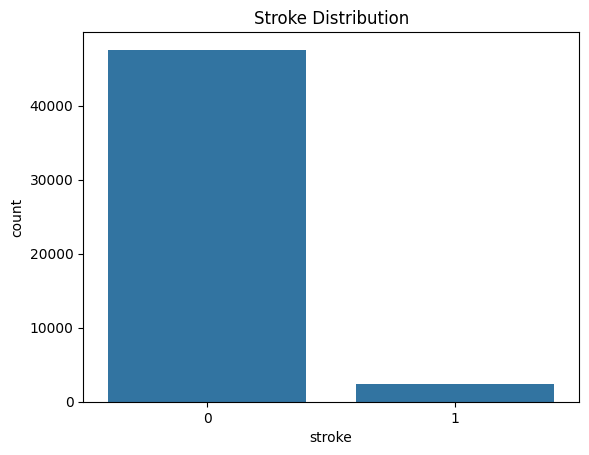

In [48]:
sns.countplot(x='stroke', data=data)
plt.title('Stroke Distribution')
plt.show()

C:\Users\ibrahem.ali\AppData\Local\Temp\ipykernel_2420\1339587897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gender', palette='Set2')


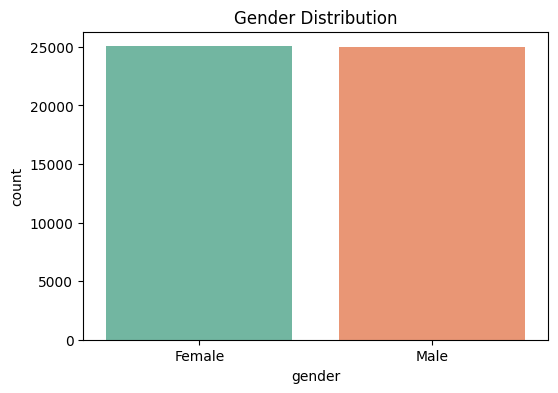

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

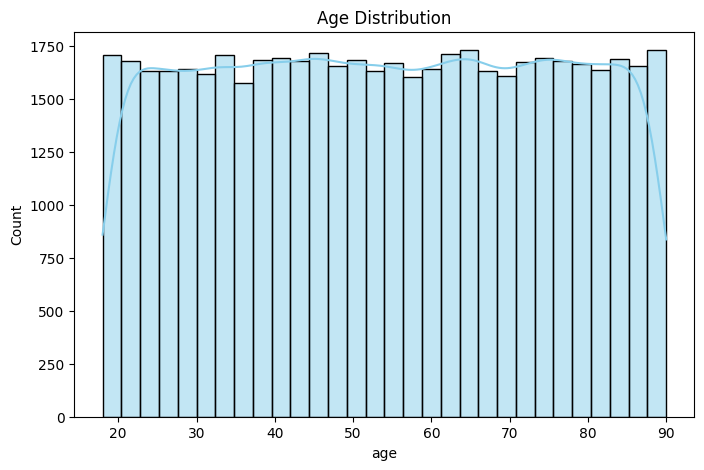

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

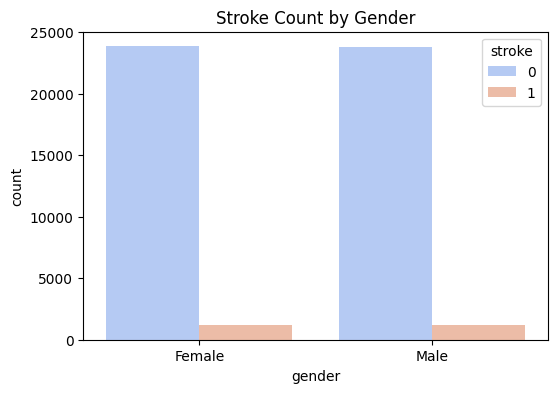

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='gender', hue='stroke', palette='coolwarm')
plt.title("Stroke Count by Gender")
plt.show()

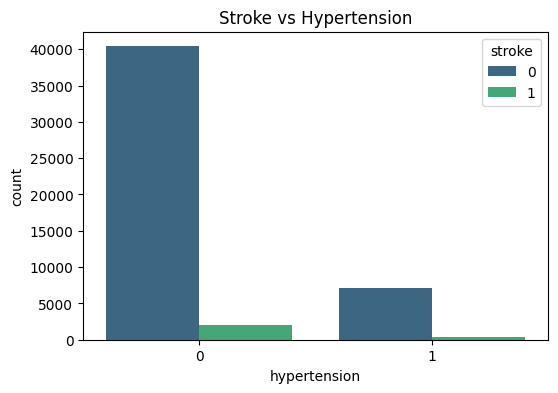

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='hypertension', hue='stroke', palette='viridis')
plt.title("Stroke vs Hypertension")
plt.show()

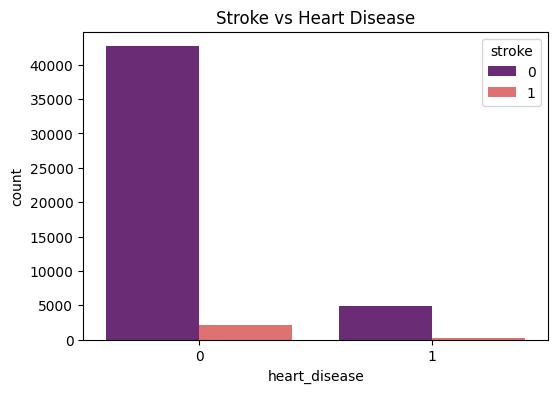

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='heart_disease', hue='stroke', palette='magma')
plt.title("Stroke vs Heart Disease")
plt.show()

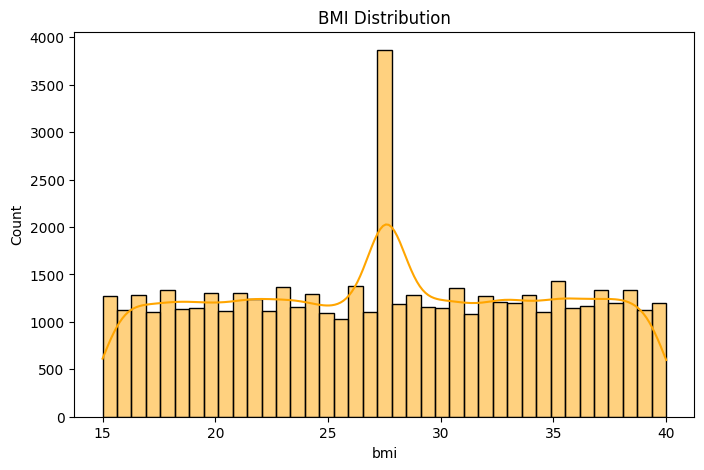

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(data['bmi'].dropna(), kde=True, color='orange')
plt.title("BMI Distribution")
plt.show()

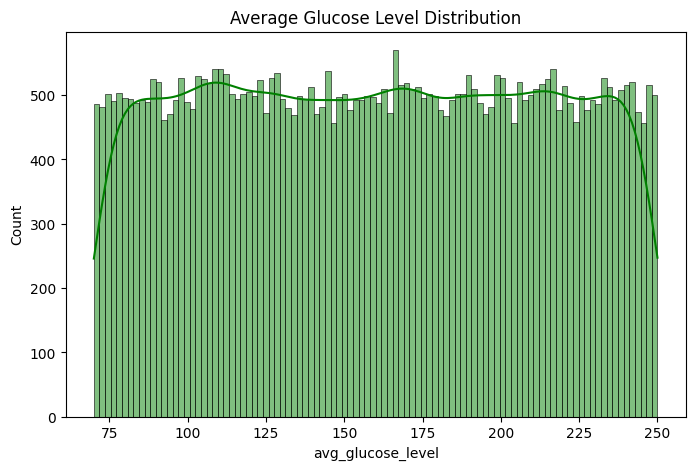

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(data['avg_glucose_level'], bins=100, kde=True, color='green')
plt.title("Average Glucose Level Distribution")
plt.show()

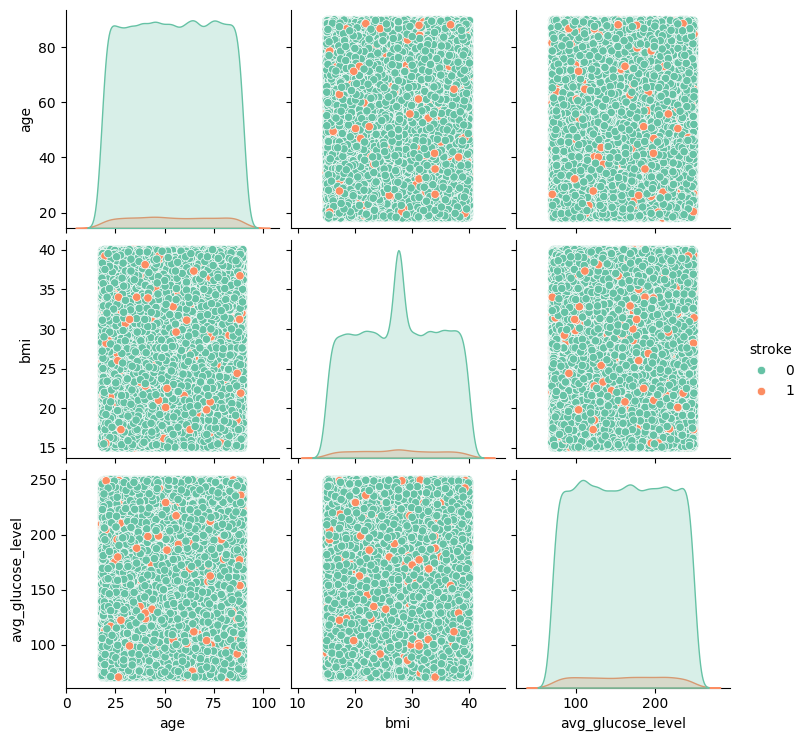

In [56]:
sns.pairplot(data, hue='stroke', vars=['age','bmi','avg_glucose_level'], palette='Set2')
plt.show();

## Data Encoding

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

In [58]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])  
data['ever_married'] = le.fit_transform(data['ever_married'])

data = pd.get_dummies(data, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [63]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,80.3,0,0,1,170.38,18.4,0,True,False,False,True,False,False,False
1,0,89.4,0,0,1,186.89,19.6,0,False,False,True,True,True,False,False
2,1,87.5,0,0,1,118.42,34.7,0,False,False,False,True,False,True,False
3,1,19.7,0,0,1,226.01,27.1,0,False,True,False,True,False,False,True
4,1,85.2,0,0,1,229.64,27.6,0,False,False,False,False,False,False,False


### Over Sampling

In [ ]:
data.drop('id', axis=1, inplace=True)

X = data.drop('stroke', axis=1)
y = data['stroke']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

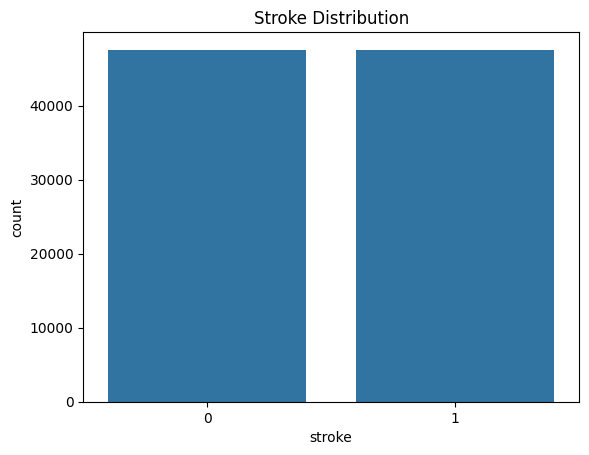

In [66]:
# Merge X_res and y_res
merged_df = pd.concat([X_res, y_res], axis=1)

sns.countplot(x='stroke', data=merged_df)
plt.title('Stroke Distribution')
plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
X_train.shape

(40000, 14)

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
rf_model.predict_proba(X_test_scaled)

array([[0.95333333, 0.04666667],
       [0.87333333, 0.12666667],
       [0.98666667, 0.01333333],
       ...,
       [0.92      , 0.08      ],
       [0.92      , 0.08      ],
       [0.88666667, 0.11333333]], shape=(10000, 2))

In [75]:
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9515


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9515
           1       0.00      0.00      0.00       485

    accuracy                           0.95     10000
   macro avg       0.48      0.50      0.49     10000
weighted avg       0.91      0.95      0.93     10000



c:\Users\ibrahem.ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ibrahem.ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ibrahem.ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

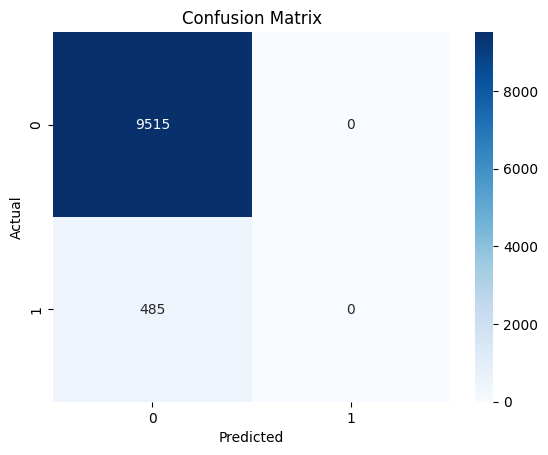

In [77]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XGBoost Model Implementation 

In [78]:
xgb_model = XGBClassifier(
    n_estimators=150,           # Same as n_estimators in your RF model
    learning_rate=0.1,          # Standard default value
    random_state=42,
    use_label_encoder=False,    # Recommended to avoid warnings
    eval_metric='logloss'       # Standard evaluation metric
)

In [79]:
xgb_model.fit(X_train, y_train)

c:\Users\ibrahem.ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:25:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [80]:
y_pred_xgb = xgb_model.predict(X_test)

In [82]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.9512


In [83]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Stroke (0)', 'Stroke (1)']))


Classification Report:
               precision    recall  f1-score   support

No Stroke (0)       0.95      1.00      0.97      9515
   Stroke (1)       0.00      0.00      0.00       485

     accuracy                           0.95     10000
    macro avg       0.48      0.50      0.49     10000
 weighted avg       0.91      0.95      0.93     10000



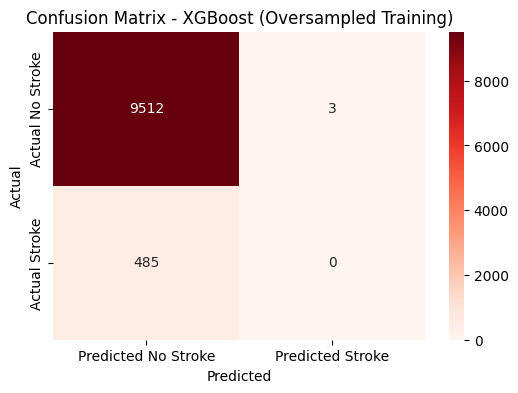

In [84]:
# 5. Visualize Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds',
    xticklabels=['Predicted No Stroke', 'Predicted Stroke'],
    yticklabels=['Actual No Stroke', 'Actual Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (Oversampled Training)')
plt.show()